# K nearest-neightbours

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn import datasets
from scipy import stats
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
from sklearn import neighbors

In [2]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(iris.data,iris.target,test_size=.2)

In [4]:
k_range = range(1,26)
scores_list_test = []
scores_list_train = []
for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    x_pred = knn.predict(X_train)
    #print(knn)
    scores_list_test.append(metrics.accuracy_score(y_test,y_pred))
    scores_list_train.append(metrics.accuracy_score(y_train,x_pred))

In [5]:
print(scores_list_test)

[1.0, 0.9666666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 1.0, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667]


In [6]:
print(scores_list_train)

[1.0, 0.975, 0.95, 0.9583333333333334, 0.9666666666666667, 0.9666666666666667, 0.975, 0.975, 0.975, 0.9833333333333333, 0.975, 0.975, 0.9666666666666667, 0.975, 0.9833333333333333, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.9583333333333334, 0.9666666666666667, 0.9583333333333334, 0.9666666666666667]


In [7]:
print(knn.score(X_test,y_test))
print(knn.score(X_train,y_train))

0.9666666666666667
0.9666666666666667


In [8]:
print(metrics.f1_score(y_test, y_pred, average='macro'))
print(metrics.f1_score(y_train, x_pred, average='macro'))

0.9538239538239538
0.9681818181818183


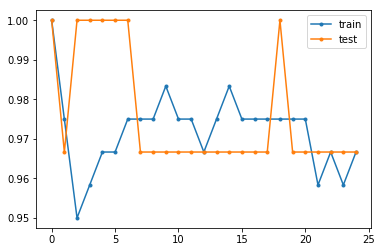

In [9]:
plt.plot(scores_list_train,marker='.',label="train")
plt.legend()
plt.plot(scores_list_test,marker='.',label="test")
plt.legend()

In [10]:
n_neighbors = 15
h = .02  # step size in the mesh
# Create color maps
# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target
cmap_light = colors.ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = colors.ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

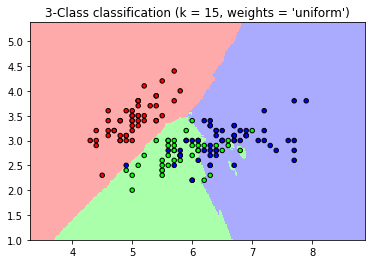

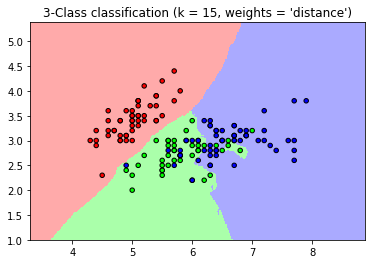

In [11]:
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

In [168]:
medicina_df = pd.read_csv("Kaggle/mexican_medical_students_mental_health_data.csv")
medicina_df.head()

,id,school_year,semester,age,gender,height,weight,phq1,phq2,phq3,...,epw6,epw7,epw8,bed_time,wake_up_time,reported_sleep_hours,times_week_nap,nap_duration,weekly_study_hours,grades
0,A1,1,1,19.0,m,1.50,75.0,2.0,1.0,1.0,...,0.0,1.0,1.0,01:00,06:30,02:00,1.0,02:00,12:00,8.0
1,B2,1,1,18.0,m,1.68,56.0,2.0,0.0,1.0,...,0.0,2.0,2.0,00:00,08:15,07:00,2.0,02:00,05:00,6.5
2,C3,1,1,19.0,m,1.74,76.0,1.0,1.0,0.0,...,0.0,1.0,1.0,02:00,06:30,04:00,1.0,00:30,42:00,7.0
3,D4,1,1,18.0,f,1.68,67.0,2.0,2.0,3.0,...,0.0,3.0,0.0,00:30,07:00,05:00,4.0,02:00,12:30,6.0
4,E5,1,1,18.0,m,1.80,83.0,0.0,1.0,1.0,...,0.0,0.0,0.0,23:00,07:30,08:00,2.0,01:00,15:00,NaN


In [169]:
medicina_df.replace({'gender' : "f"}, 0, inplace=True)

In [170]:
medicina_df.replace({'gender' : "m"}, 1, inplace=True)

In [171]:
medicina = medicina_df[['height','weight','gender']].dropna()
medicina.head()

,height,weight,gender
0,1.50,75.0,1.0
1,1.68,56.0,1.0
2,1.74,76.0,1.0
3,1.68,67.0,0.0
4,1.80,83.0,1.0


In [172]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(medicina[['height','weight']],medicina['gender'],test_size=.2)

In [173]:
k_range = range(1,26)
scores_list_test = []
scores_list_train = []
for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    x_pred = knn.predict(X_train)
    #print(knn)
    scores_list_test.append(metrics.accuracy_score(y_test,y_pred))
    scores_list_train.append(metrics.accuracy_score(y_train,x_pred))

In [174]:
print(scores_list_test)

[0.7792207792207793, 0.8051948051948052, 0.7922077922077922, 0.7922077922077922, 0.8051948051948052, 0.8051948051948052, 0.8181818181818182, 0.7987012987012987, 0.8181818181818182, 0.7987012987012987, 0.8246753246753247, 0.8246753246753247, 0.8311688311688312, 0.8441558441558441, 0.8376623376623377, 0.8246753246753247, 0.8376623376623377, 0.8246753246753247, 0.8116883116883117, 0.8116883116883117, 0.8181818181818182, 0.8246753246753247, 0.8181818181818182, 0.8311688311688312, 0.8311688311688312]


In [175]:
print(scores_list_train)

[0.9380097879282219, 0.8727569331158238, 0.8743882544861338, 0.8646003262642741, 0.8613376835236541, 0.8564437194127243, 0.8499184339314845, 0.8384991843393148, 0.8401305057096248, 0.833605220228385, 0.8238172920065253, 0.8221859706362153, 0.8205546492659054, 0.8091353996737357, 0.8172920065252854, 0.8205546492659054, 0.8189233278955954, 0.8123980424143556, 0.8058727569331158, 0.8058727569331158, 0.8075040783034257, 0.7911908646003263, 0.8058727569331158, 0.800978792822186, 0.8058727569331158]


In [176]:
print(knn.score(X_test,y_test))
print(knn.score(X_train,y_train))

0.8311688311688312
0.8058727569331158


In [177]:
print(metrics.f1_score(y_test, y_pred, average='macro'))
print(metrics.f1_score(y_train, x_pred, average='macro'))

0.8309121621621622
0.8058396880531268


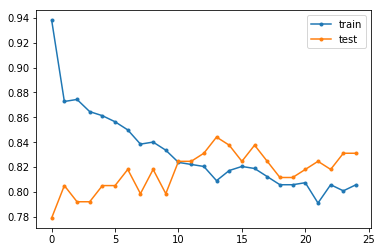

In [178]:
plt.plot(scores_list_train,marker='.',label="train")
plt.legend()
plt.plot(scores_list_test,marker='.',label="test")
plt.legend()

In [179]:
def plot_roc_curve(fpr, tpr):  
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [180]:
model = knn.fit(X_train,y_train)

In [181]:
probs = model.predict_proba(X_test)  

In [182]:
probs = probs[:,1] 

In [183]:
auc = metrics.roc_auc_score(y_test, probs)  
print('AUC: %.2f' % auc) 

AUC: 0.86


In [184]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)

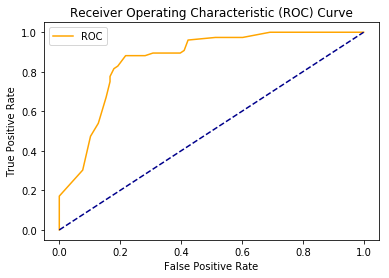

In [185]:
plot_roc_curve(fpr, tpr)

In [186]:
probs = model.predict_proba(X_train) 

In [187]:
probs = probs[:,1] 

In [188]:
auc = metrics.roc_auc_score(y_train, probs)  
print('AUC: %.2f' % auc) 

AUC: 0.88


In [189]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, probs)

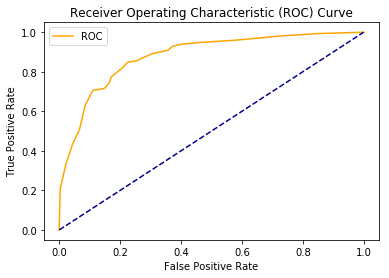

In [190]:
plot_roc_curve(fpr, tpr)  

In [191]:
55/76

0.7236842105263158

In [192]:
2*((0.75)*(0.79))/(.75+.79)

0.7694805194805195